Markdown text and links is mostly for my own use and provides some descriptions of the following code/graphs. I made a note of all the cells that I don't plan to use in the research paper in the markdown above them. I am unsure about most of them though because I need help figuring out what to put in my paper.
This notebook is a compilation of graphs and results.

https://en.wikipedia.org/wiki/Emission_spectrum

https://en.wikipedia.org/wiki/Spectral_line_ratios

https://en.wikipedia.org/wiki/Balmer_series

Unsure whether to include in the paper because don't know how to tie it back to anything.
This script visualizes the relationship between two important emission line ratios in galaxies, specifically [NII]/Hα and [OIII]/Hβ, using data from the SDSS. The scatter plot shows data points, and the overlaid lines represent empirical relationships from Kewley et al 2001 that distinguish different types of galaxies. These diagrams are often called BPT plots, Osterbrock diagrams, or Kewley diagrams. This plot classifies two different galaxies based on their emission line properties, helping to distinguish between different types of galaxies such as star-forming galaxies, active galactic nuclei (AGN), and others. 

The following code loads spectral data from the SDSS data release to analyze key emission line ratios. It visualizes the relationship between two critical line ratios, distinguishing between major classes of galaxies. Additionally, the code plots the empirical relationship for the [OIII]/Hβ and [NII]/Hα line ratios, providing insight into the physical characteristics of these galaxies.

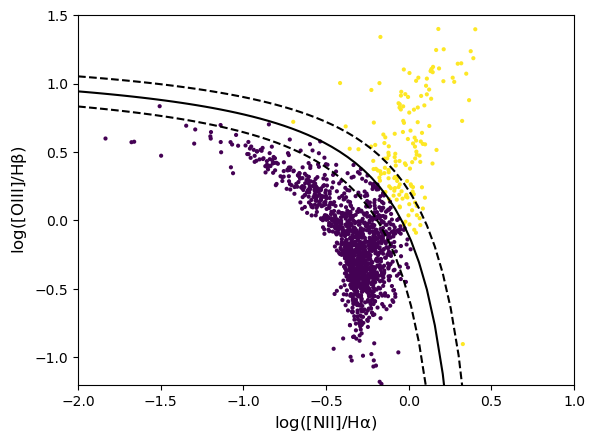

In [6]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_NII

data = fetch_sdss_corrected_spectra()

i = np.where((data['lineindex_cln'] == 4) | (data['lineindex_cln'] == 5))

plt.scatter(data['log_NII_Ha'][i], data['log_OIII_Hb'][i],
            c=data['lineindex_cln'][i], s=9, lw=0)

NII = np.linspace(-2.0, 0.35)
plt.plot(NII, log_OIII_Hb_NII(NII), '-k')
plt.plot(NII, log_OIII_Hb_NII(NII, 0.1), '--k')
plt.plot(NII, log_OIII_Hb_NII(NII, -0.1), '--k')
plt.xlim(-2.0, 1.0)
plt.ylim(-1.2, 1.5)

plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize='large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize='large')
plt.show()


The curse of dimensionality is an expression coined by Richard E. Bellman and refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings. The curse generally refers to issues that arise when the number of datapoints is small (in a suitably defined sense) relative to the intrinsic dimension of the data.

Dimensionally cursed phenomena occur in domains such as numerical analysis, sampling, combinatorics, machine learning, data mining and databases. The common theme of these problems is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties; in high dimensional data, however, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.

Don't plan to use in the paper - has nothing to do with SDSS data.
This example visually represents the relationship between an original coordinate system and a rotated one. It shows how points, generated from a bivariate normal distribution, transform when rotated. The ellipses represent the spread of these points in the original coordinates, while the lines project these points onto the rotated x' axis. What PCA does is equivalent to minimizing the square of the perpendicular distances between the points and the principal components.

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import ticker

In [10]:
np.random.seed(42)
r = 0.9

sigma1 = 0.25
sigma2 = 0.08
rotation = np.pi / 6
s = np.sin(rotation)
c = np.cos(rotation)

X = np.random.normal(0, [sigma1, sigma2], size=(100, 2)).T
R = np.array([[c, -s],
              [s, c]])
X = np.dot(R, X)

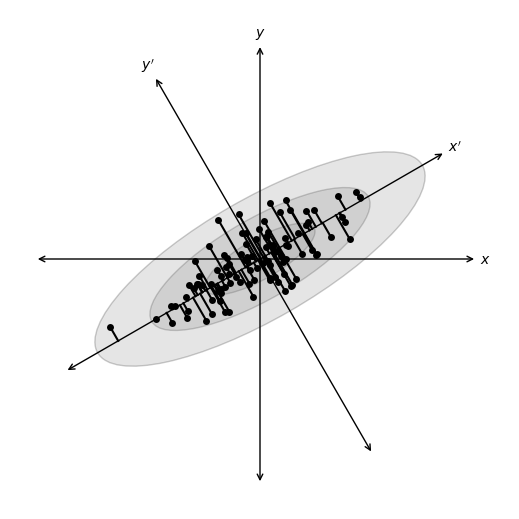

In [11]:
#------------------------------------------------------------
# Plot the diagram
fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = plt.axes((0, 0, 1, 1), xticks=[], yticks=[], frameon=False)

# draw axes
ax.annotate(r'$x$', (-r, 0), (r, 0),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', color='k', lw=1))
ax.annotate(r'$y$', (0, -r), (0, r),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', color='k', lw=1))

# draw rotated axes
ax.annotate(r'$x^\prime$', (-r * c, -r * s), (r * c, r * s),
            ha='center', va='center',
            arrowprops=dict(color='k', arrowstyle='<->', lw=1))
ax.annotate(r'$y^\prime$', (r * s, -r * c), (-r * s, r * c),
            ha='center', va='center',
            arrowprops=dict(color='k', arrowstyle='<->', lw=1))

# scatter points
ax.scatter(X[0], X[1], s=25, lw=0, c='k', zorder=2)

# draw lines
vnorm = np.array([s, -c])
for v in (X.T):
    d = np.dot(v, vnorm)
    v1 = v - d * vnorm
    ax.plot([v[0], v1[0]], [v[1], v1[1]], '-k')

# draw ellipses
for sigma in (1, 2, 3):
    ax.add_patch(Ellipse((0, 0), 2 * sigma * sigma1, 2 * sigma * sigma2,
                         angle=rotation * 180. / np.pi,
                         ec='k', fc='gray', alpha=0.2, zorder=1))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

Don't plan to use in paper - has nothing to do with SDSS data.
In this example, I start with a 100x3 matrix of data points and then increase the dimensionality to 10 by multiplying with a random matrix. PCA is then applied to reduce the dimensionality of the data back down to 4, capturing the directions in which the data varies the most. The transformed data (comp), the mean of the original features, the principal components, and the variance explained by each component are all obtained from the PCA model.

In [75]:
from sklearn.decomposition import PCA

X = np.random.normal(size=(100, 3))
R = np.random.random((3, 10))
X = np.dot(X, R)

pca = PCA(n_components=4)
pca.fit(X)
comp = pca.transform(X)


print("Mean of the data:", pca.mean_)
print("\nPrincipal components (eigenvectors):")
print(pca.components_)
print("\nExplained variance (eigenvalues):")
print(pca.explained_variance_)
print("\nTransformed data (projected onto principal components):")
print(comp)

# the explained variance ratio is how much variance each component explains
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)


Mean of the data: [ 0.13021895  0.01106391  0.05295125  0.1291248  -0.01658965  0.06469851
  0.015318    0.01107642 -0.03817369  0.10129142]

Principal components (eigenvectors):
[[-0.37192376 -0.23258852 -0.47126111 -0.36353301 -0.16004114 -0.14592632
  -0.34741303 -0.08460031 -0.22431459 -0.47775966]
 [ 0.4340934  -0.19324798 -0.20646561  0.44132158 -0.30449881  0.26761725
  -0.30629893 -0.02300826 -0.51515387  0.11293768]
 [ 0.08592811 -0.4957248   0.41883276 -0.24845158  0.30707129 -0.39278297
  -0.05778017 -0.17617967 -0.41412215  0.23511272]
 [ 0.17148174 -0.07737245 -0.43800442 -0.46641064 -0.0713993   0.04623296
  -0.14543365  0.06061144  0.24841336  0.67930223]]

Explained variance (eigenvalues):
[6.55518041e+00 1.12772071e+00 3.32776294e-01 7.29195750e-32]

Transformed data (projected onto principal components):
[[-2.82365613e+00  1.29872426e+00 -5.62434788e-01 -3.67848647e-16]
 [ 1.49002836e+00 -6.21918177e-01 -1.15757315e-01  2.58625371e-16]
 [-2.66046782e+00 -6.44924416e-0

AstroML provides a set of spectra which have been moved to rest frame, corrected for masking using an iterative PCA reconstruction technique, and resampled to 1000 common wavelength bins. This code fetches and processes a dataset of SDSS corrected spectra using pre-computed PCA for spectral reconstruction. After reconstructing the spectra, it selects a random sample of 15 spectra (organized into a 5x3 grid layout) from both the raw and corrected datasets. These selected spectra can be further analyzed or visualized, comparing the original (raw) spectra with the reconstructed (corrected) ones.

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import sdss_corrected_spectra

#----------------------------------------------------------------------
# Use pre-computed PCA to reconstruct spectra
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra_raw = data['spectra']
spectra_corr = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#------------------------------------------------------------
# select random spectra
np.random.seed(5)
nrows = 5
ncols = 3
ind = np.random.randint(spectra_corr.shape[0], size=nrows * ncols)
spec_sample_raw = spectra_raw[ind]
spec_sample_corr = spectra_corr[ind]

This code creates a grid of subplots (in this case, 5x3) to display a side-by-side comparison of raw (black) and PCA-corrected SDSS spectra (blue). Each subplot represents a different randomly selected spectrum, showing both the original and reconstructed versions. The x-axis represents the wavelength, and the y-axis represents the flux, though the y-axis labels are removed to keep the plots clean. The layout and spacing of the subplots are adjusted for optimal visualization.

/var/folders/ft/v95g07nj1tqd8z0ypsb6_bqm0000gn/T/ipykernel_17082/1814329569.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax.plot(wavelengths, spec_sample_corr[ncols * j + i], '-k', lw=1, c='blue')


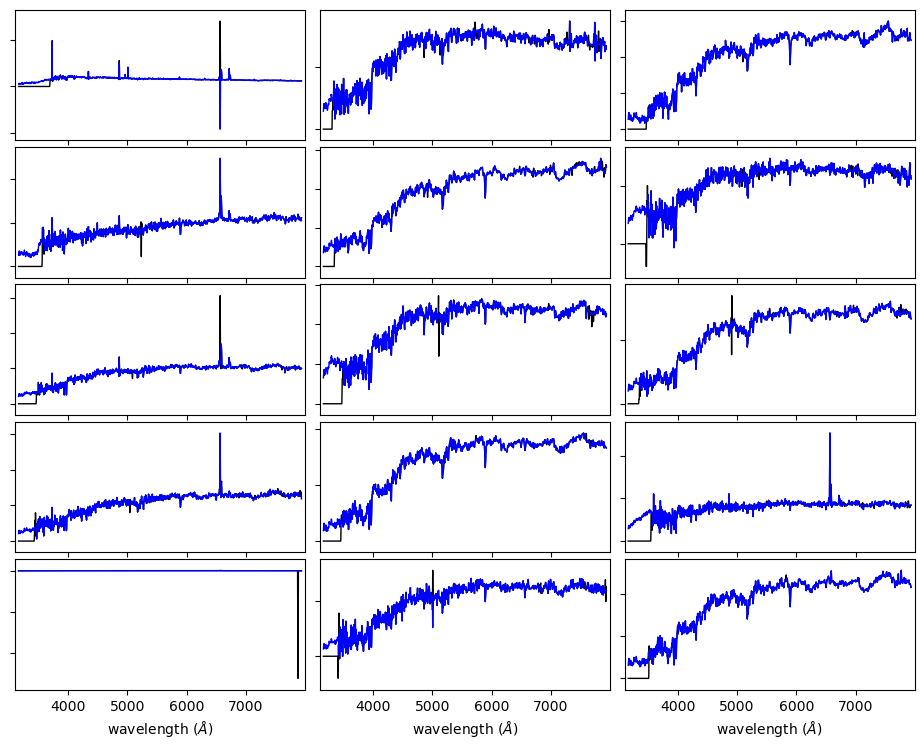

In [23]:
fig = plt.figure(figsize=(10, 8))

fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

for i in range(ncols):
    for j in range(nrows):
        ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
        ax.plot(wavelengths, spec_sample_raw[ncols * j + i], '-k', lw=1)
        ax.plot(wavelengths, spec_sample_corr[ncols * j + i], '-k', lw=1, c='blue')               
        ax.set_xlim(3100, 7999)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < nrows - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            plt.xlabel(r'wavelength $(\AA)$')

        ylim = ax.get_ylim()
        dy = 0.05 * (ylim[1] - ylim[0])
        ax.set_ylim(ylim[0] - dy, ylim[1] + dy)

plt.show()

This code illustrates how to visualize the process of reconstructing an SDSS spectrum using PCA. It shows how the accuracy of the reconstruction improves as more principal components are added, with each subplot showing the spectrum reconstructed with a different number of components. The final plot provides insight into how well the PCA captures the variance in the spectral data. The input spectrum is shown in gray, and the partial reconstruction for progressively more terms is shown in black. The top panel shows only the mean of the set of spectra. By the time 20 PCA components are added, the reconstruction is very close to the input, as indicated by the expected total variance of 94%.

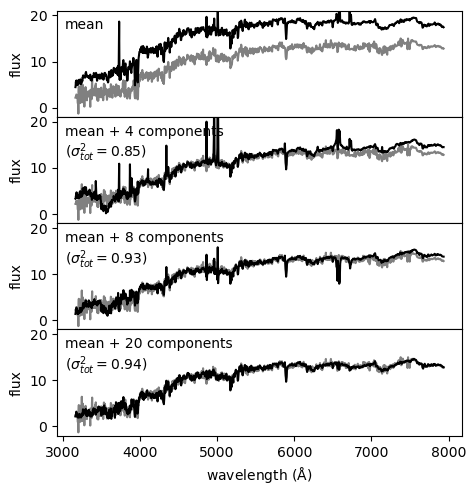

In [26]:
#------------------------------------------------------------
# Compute PCA components

# Eigenvalues can be computed using PCA as in the commented code below:

#from sklearn.decomposition import PCA
#pca = PCA()
#pca.fit(spectra_corr)
#evals = pca.explained_variance_ratio_
#evals_cs = evals.cumsum()

#  because the spectra have been reconstructed from masked values, this
#  is not exactly correct in this case: we'll use the values computed
#  in the file compute_sdss_pca.py
evals = data['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]
evecs = data['evecs']
spec_mean = spectra_corr.mean(0)

#------------------------------------------------------------
# Find the coefficients of a particular spectrum
spec = spectra_corr[1]
coeff = np.dot(evecs, spec - spec_mean)

#------------------------------------------------------------
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

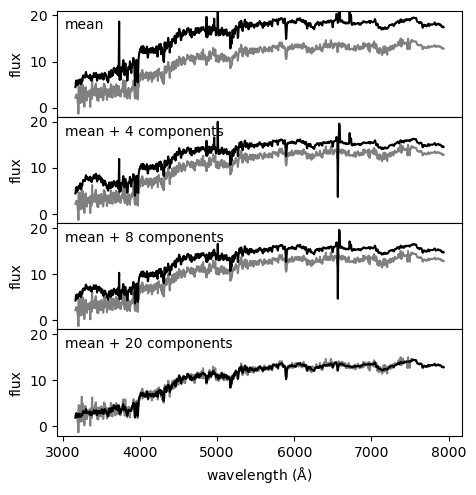

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Assuming `spectra_corr` is your input data and `wavelengths` is your x-axis
# Load or preprocess your data here
# spectra_corr = ... (your spectra data)
# wavelengths = ... (your wavelength data)

# Set up and fit the ICA model
n_components = 20  # Maximum number of components you want to use
ica = FastICA(n_components=n_components, random_state=42)
S_ = ica.fit_transform(spectra_corr)  # Get the independent components
A_ = ica.mixing_  # Mixing matrix
spec_mean = spectra_corr.mean(axis=0)

# Find the coefficients of a particular spectrum
spec = spectra_corr[1]
coeff = np.dot(np.linalg.pinv(A_), (spec - spec_mean))

# Plot the sequence of reconstructions
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray', label='Original Spectrum')
    
    if n > 0:
        reconstructed_spec = spec_mean + np.dot(coeff[:n], A_[:, :n].T)
    else:
        reconstructed_spec = spec_mean
    
    ax.plot(wavelengths, reconstructed_spec, '-k', label=f'Mean + {n} components')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')
    
    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component"
    else:
        text = f"mean + {n} components"

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()


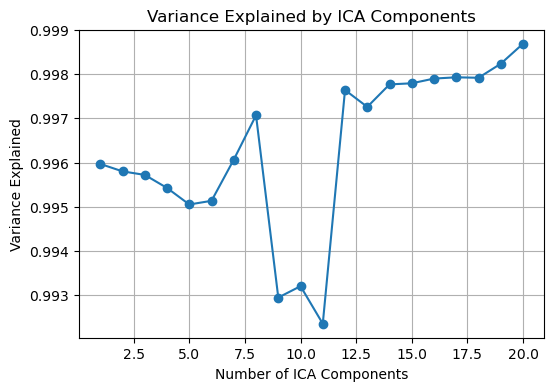

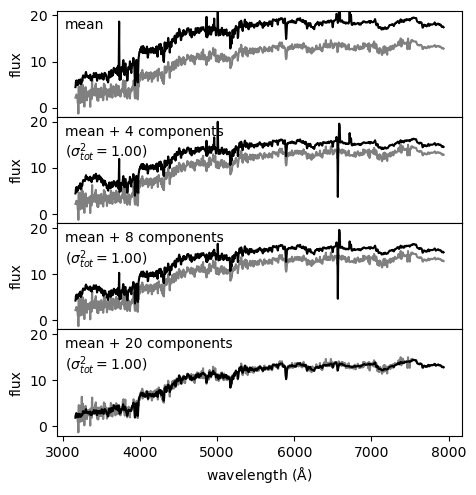

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Assuming `spectra_corr` is your input data and `wavelengths` is your x-axis
# Load or preprocess your data here
# spectra_corr = ... (your spectra data)
# wavelengths = ... (your wavelength data)

# Set up and fit the ICA model
n_components = 20  # Maximum number of components you want to use
ica = FastICA(n_components=n_components, random_state=42)
S_ = ica.fit_transform(spectra_corr)  # Get the independent components
A_ = ica.mixing_  # Mixing matrix
spec_mean = spectra_corr.mean(axis=0)

# Find the coefficients of a particular spectrum
spec = spectra_corr[1]
coeff = np.dot(np.linalg.pinv(A_), (spec - spec_mean))

# Variance explained calculations
total_variance = np.var(spectra_corr)
variances_explained = []

# Compute variance explained for different number of components
for n in range(1, n_components + 1):
    # Reconstruct the spectrum with n components
    reconstructed_spec = spec_mean + np.dot(coeff[:n], A_[:, :n].T)
    
    # Calculate the reconstruction error
    residual = spec - reconstructed_spec
    variance_explained = 1 - np.var(residual) / total_variance
    variances_explained.append(variance_explained)

# Plotting the variance explained
plt.figure(figsize=(6, 4))
plt.plot(range(1, n_components + 1), variances_explained, marker='o', linestyle='-')
plt.xlabel('Number of ICA Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by ICA Components')
plt.grid(True)
plt.show()

# Plot the sequence of reconstructions
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray', label='Original Spectrum')
    
    if n > 0:
        reconstructed_spec = spec_mean + np.dot(coeff[:n], A_[:, :n].T)
    else:
        reconstructed_spec = spec_mean
    
    ax.plot(wavelengths, reconstructed_spec, '-k', label=f'Mean + {n} components')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')
    
    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % variances_explained[n - 1]
    else:
        text = f"mean + {n} components\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % variances_explained[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()


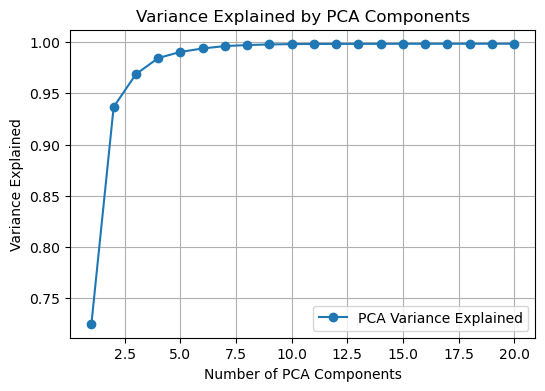

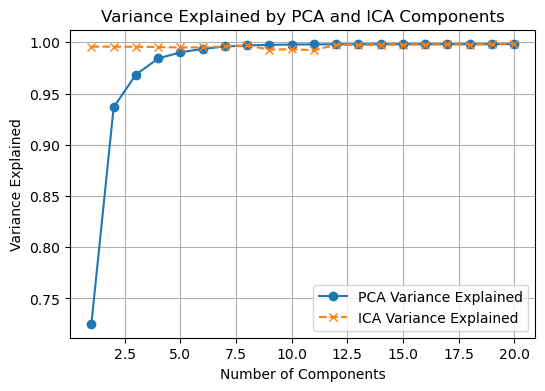

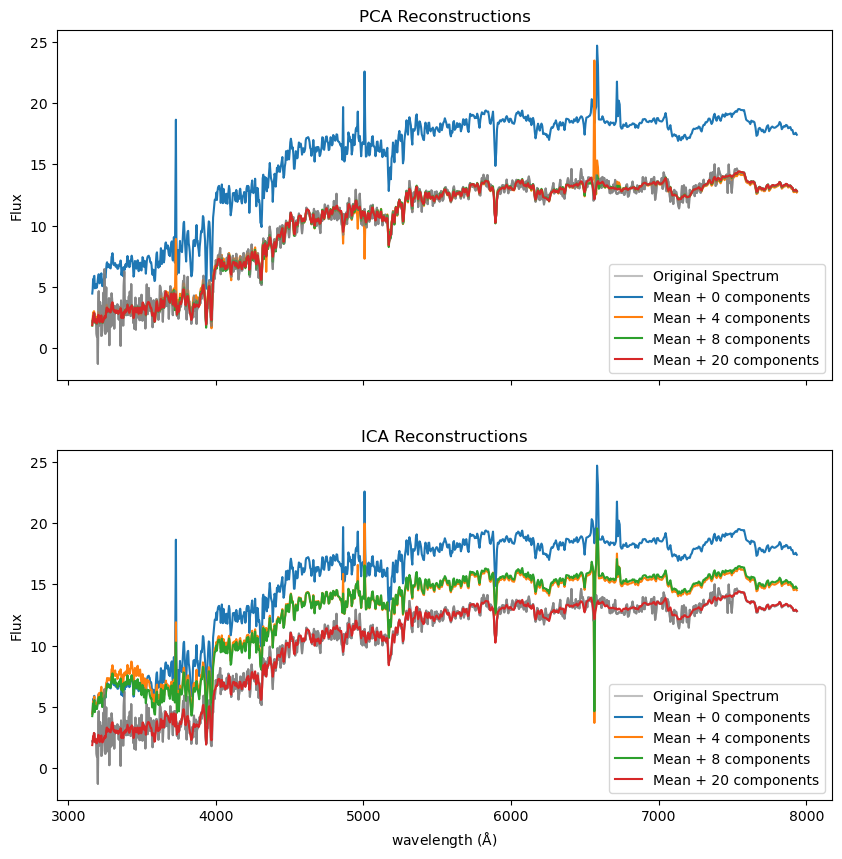

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

# Assuming `spectra_corr` is your input data and `wavelengths` is your x-axis
# Load or preprocess your data here
# spectra_corr = ... (your spectra data)
# wavelengths = ... (your wavelength data)

# Set up and fit the PCA model
n_components = 20  # Maximum number of components you want to use for comparison
pca = PCA(n_components=n_components)
pca.fit(spectra_corr)

# Compute PCA components and explained variance
pca_evecs = pca.components_
pca_mean = pca.mean_
pca_evals = pca.explained_variance_ratio_
pca_evals_cs = pca_evals.cumsum()

# Find the coefficients of a particular spectrum using PCA
spec = spectra_corr[1]
pca_coeff = np.dot(pca_evecs, spec - pca_mean)

# Plot PCA variance explained
plt.figure(figsize=(6, 4))
plt.plot(range(1, n_components + 1), pca_evals_cs, marker='o', linestyle='-', label='PCA Variance Explained')
plt.xlabel('Number of PCA Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by PCA Components')
plt.grid(True)
plt.legend()
plt.show()

# Set up and fit the ICA model
ica = FastICA(n_components=n_components, random_state=42)
S_ = ica.fit_transform(spectra_corr)  # Get the independent components
A_ = ica.mixing_  # Mixing matrix
ica_mean = spectra_corr.mean(axis=0)

# Find the coefficients of a particular spectrum using ICA
ica_coeff = np.dot(np.linalg.pinv(A_), (spec - ica_mean))

# Variance explained calculations for ICA
total_variance = np.var(spectra_corr)
ica_variances_explained = []

# Compute variance explained for different number of ICA components
for n in range(1, n_components + 1):
    # Reconstruct the spectrum with n ICA components
    reconstructed_spec_ica = ica_mean + np.dot(ica_coeff[:n], A_[:, :n].T)
    
    # Calculate the reconstruction error for ICA
    residual_ica = spec - reconstructed_spec_ica
    variance_explained_ica = 1 - np.var(residual_ica) / total_variance
    ica_variances_explained.append(variance_explained_ica)

# Plotting the variance explained for both PCA and ICA
plt.figure(figsize=(6, 4))
plt.plot(range(1, n_components + 1), pca_evals_cs, marker='o', linestyle='-', label='PCA Variance Explained')
plt.plot(range(1, n_components + 1), ica_variances_explained, marker='x', linestyle='--', label='ICA Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by PCA and ICA Components')
plt.grid(True)
plt.legend()
plt.show()

# Plot the sequence of reconstructions for PCA and ICA
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# PCA Reconstruction Plot
axs[0].set_title("PCA Reconstructions")
for i, n in enumerate([0, 4, 8, 20]):
    axs[0].plot(wavelengths, spec, '-', c='gray', alpha=0.5, label='Original Spectrum' if i == 0 else "")
    if n > 0:
        reconstructed_spec_pca = pca_mean + np.dot(pca_coeff[:n], pca_evecs[:n])
    else:
        reconstructed_spec_pca = pca_mean
    
    axs[0].plot(wavelengths, reconstructed_spec_pca, label=f'Mean + {n} components')

axs[0].set_ylabel('Flux')
axs[0].legend()

# ICA Reconstruction Plot
axs[1].set_title("ICA Reconstructions")
for i, n in enumerate([0, 4, 8, 20]):
    axs[1].plot(wavelengths, spec, '-', c='gray', alpha=0.5, label='Original Spectrum' if i == 0 else "")
    if n > 0:
        reconstructed_spec_ica = ica_mean + np.dot(ica_coeff[:n], A_[:, :n].T)
    else:
        reconstructed_spec_ica = ica_mean
    
    axs[1].plot(wavelengths, reconstructed_spec_ica, label=f'Mean + {n} components')

axs[1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
axs[1].set_ylabel('Flux')
axs[1].legend()

plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


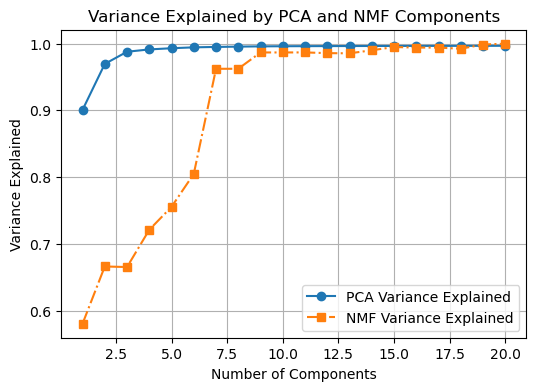

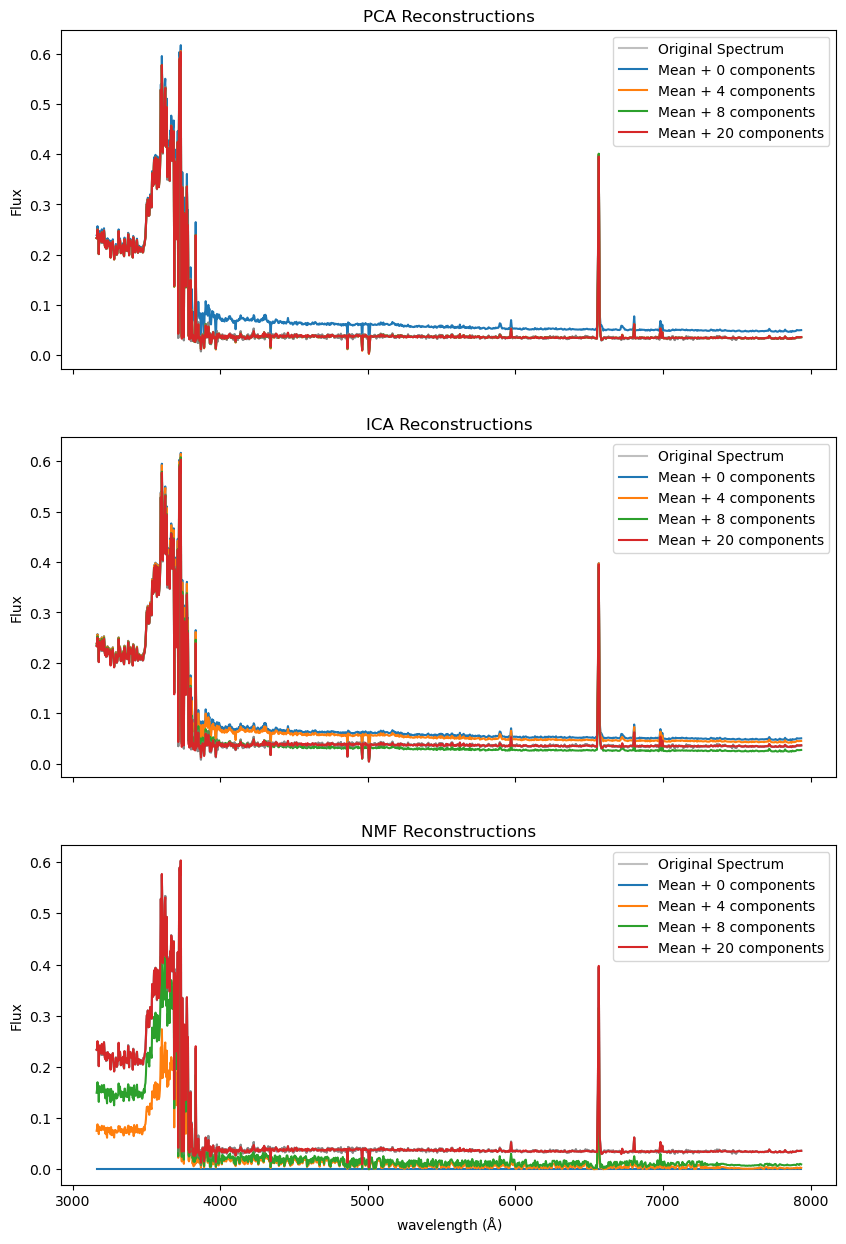

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA, NMF

# Assuming `spectra_corr` is your input data and `wavelengths` is your x-axis
# Load or preprocess your data here
# spectra_corr = ... (your spectra data)
# wavelengths = ... (your wavelength data)

# Shift spectra_corr to be non-negative
min_value = spectra_corr.min()
spectra_corr_shifted = spectra_corr - min_value  # Shift data to make it non-negative

# Number of components
n_components = 20

# Set up and fit the PCA model
pca = PCA(n_components=n_components)
pca.fit(spectra_corr)

# Compute PCA components and explained variance
pca_evecs = pca.components_
pca_mean = pca.mean_
pca_evals = pca.explained_variance_ratio_
pca_evals_cs = pca_evals.cumsum()

# Find the coefficients of a particular spectrum using PCA
spec = spectra_corr[1]
pca_coeff = np.dot(pca_evecs, spec - pca_mean)

# Set up and fit the ICA model
ica = FastICA(n_components=n_components, random_state=42)
S_ = ica.fit_transform(spectra_corr)  # Get the independent components
A_ = ica.mixing_  # Mixing matrix
ica_mean = spectra_corr.mean(axis=0)

# Find the coefficients of a particular spectrum using ICA
ica_coeff = np.dot(np.linalg.pinv(A_), (spec - ica_mean))

# Set up and fit the NMF model on the shifted data
nmf = NMF(n_components=n_components, init='random', random_state=42)
W = nmf.fit_transform(spectra_corr_shifted)  # Coefficients (weights)
H = nmf.components_  # Basis components

# Find the coefficients of a particular spectrum using NMF
nmf_coeff = W[1]

# Variance explained calculations for NMF
total_variance = np.var(spectra_corr_shifted)
nmf_variances_explained = []

# Compute variance explained for different number of NMF components
for n in range(1, n_components + 1):
    # Reconstruct the spectrum with n NMF components
    reconstructed_spec_nmf = np.dot(nmf_coeff[:n], H[:n]) + min_value
    
    # Calculate the reconstruction error for NMF
    residual_nmf = spec - reconstructed_spec_nmf
    variance_explained_nmf = 1 - np.var(residual_nmf) / total_variance
    nmf_variances_explained.append(variance_explained_nmf)

# Plotting the variance explained for PCA, ICA, and NMF
plt.figure(figsize=(6, 4))
plt.plot(range(1, n_components + 1), pca_evals_cs, marker='o', linestyle='-', label='PCA Variance Explained')
plt.plot(range(1, n_components + 1), nmf_variances_explained, marker='s', linestyle='-.', label='NMF Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by PCA and NMF Components')
plt.grid(True)
plt.legend()
plt.show()

# Plot the sequence of reconstructions for PCA, ICA, and NMF
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# PCA Reconstruction Plot
axs[0].set_title("PCA Reconstructions")
for i, n in enumerate([0, 4, 8, 20]):
    axs[0].plot(wavelengths, spec, '-', c='gray', alpha=0.5, label='Original Spectrum' if i == 0 else "")
    if n > 0:
        reconstructed_spec_pca = pca_mean + np.dot(pca_coeff[:n], pca_evecs[:n])
    else:
        reconstructed_spec_pca = pca_mean
    
    axs[0].plot(wavelengths, reconstructed_spec_pca, label=f'Mean + {n} components')

axs[0].set_ylabel('Flux')
axs[0].legend()

# ICA Reconstruction Plot
axs[1].set_title("ICA Reconstructions")
for i, n in enumerate([0, 4, 8, 20]):
    axs[1].plot(wavelengths, spec, '-', c='gray', alpha=0.5, label='Original Spectrum' if i == 0 else "")
    if n > 0:
        reconstructed_spec_ica = ica_mean + np.dot(ica_coeff[:n], A_[:, :n].T)
    else:
        reconstructed_spec_ica = ica_mean
    
    axs[1].plot(wavelengths, reconstructed_spec_ica, label=f'Mean + {n} components')

axs[1].set_ylabel('Flux')
axs[1].legend()

# NMF Reconstruction Plot
axs[2].set_title("NMF Reconstructions")
for i, n in enumerate([0, 4, 8, 20]):
    axs[2].plot(wavelengths, spec, '-', c='gray', alpha=0.5, label='Original Spectrum' if i == 0 else "")
    if n > 0:
        reconstructed_spec_nmf = np.dot(nmf_coeff[:n], H[:n]) + min_value
    else:
        reconstructed_spec_nmf = np.zeros_like(spec) + min_value  # Shifted mean for NMF reconstruction
    
    axs[2].plot(wavelengths, reconstructed_spec_nmf, label=f'Mean + {n} components')

axs[2].set_xlabel(r'${\rm wavelength\ (\AA)}$')
axs[2].set_ylabel('Flux')
axs[2].legend()

plt.show()


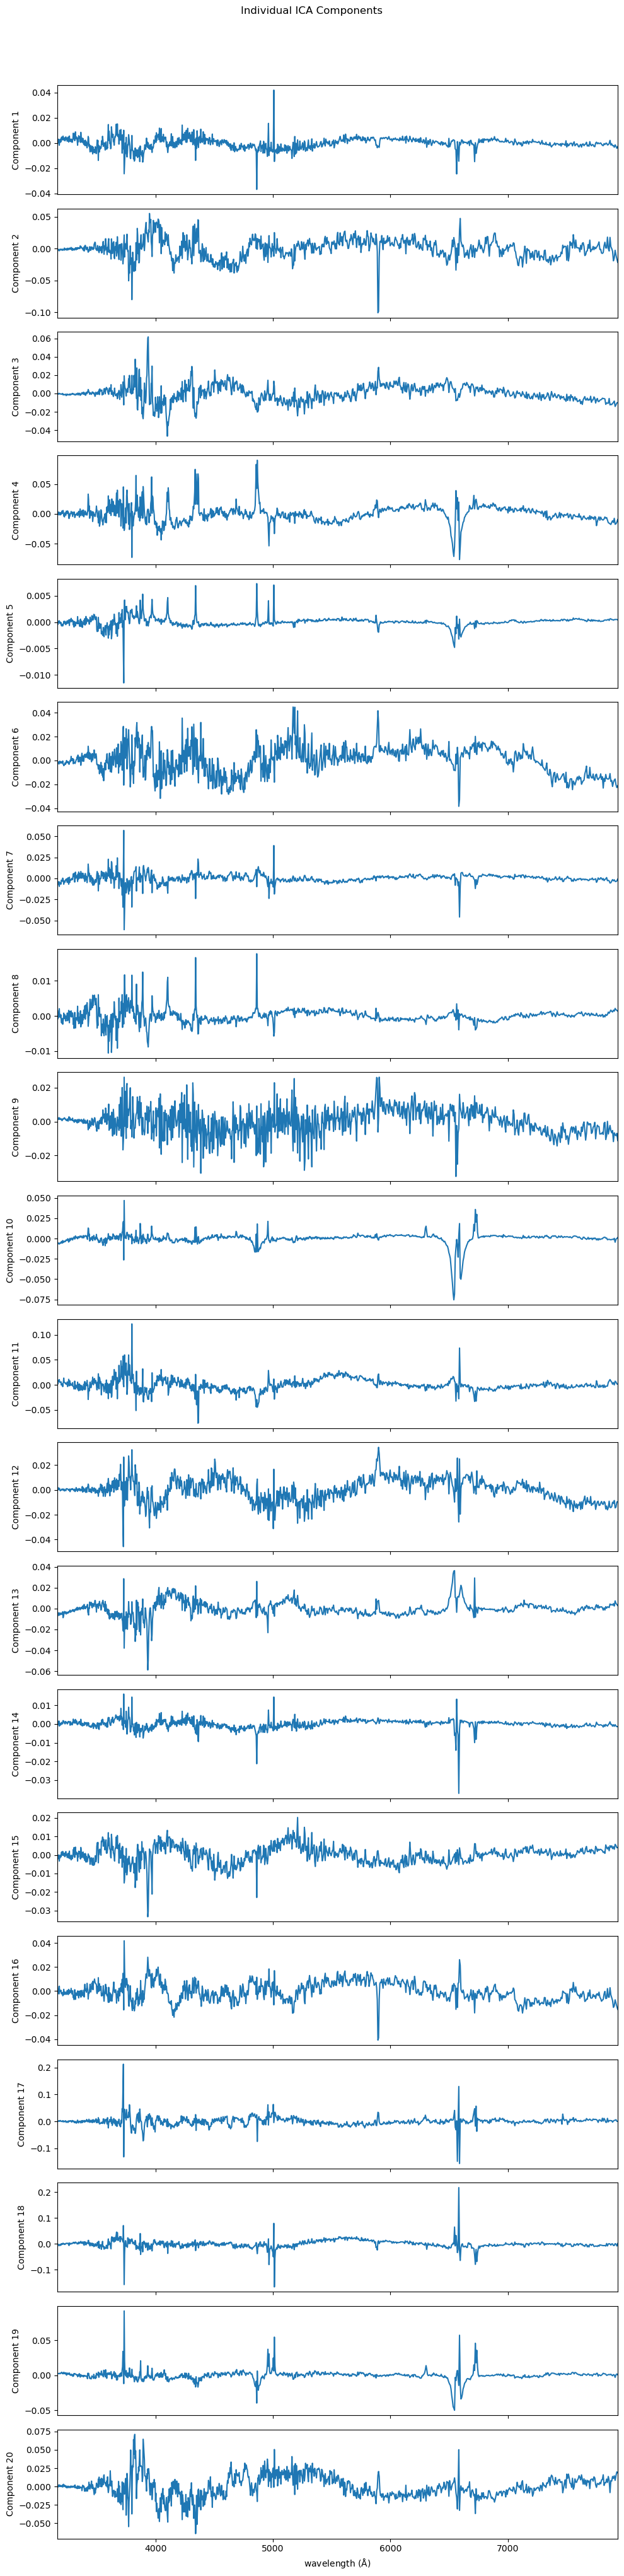

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Assuming `spectra_corr` is your input data and `wavelengths` is your x-axis
# Load or preprocess your data here
# spectra_corr = ... (your spectra data)
# wavelengths = ... (your wavelength data)

# Number of components
n_components = 20

# Set up and fit the ICA model
ica = FastICA(n_components=n_components, random_state=42)
S_ = ica.fit_transform(spectra_corr)  # Get the independent components
A_ = ica.mixing_  # Mixing matrix
ica_components = ica.components_  # The independent components

# Plot individual ICA components
fig, axs = plt.subplots(n_components, 1, figsize=(10, 2 * n_components), sharex=True)

for i, component in enumerate(ica_components):
    axs[i].plot(wavelengths, component, '-')
    axs[i].set_ylabel(f'Component {i + 1}')
    axs[i].set_xlim(wavelengths[0], wavelengths[-1])

axs[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
fig.suptitle('Individual ICA Components', y=1.02)
plt.tight_layout()
plt.show()


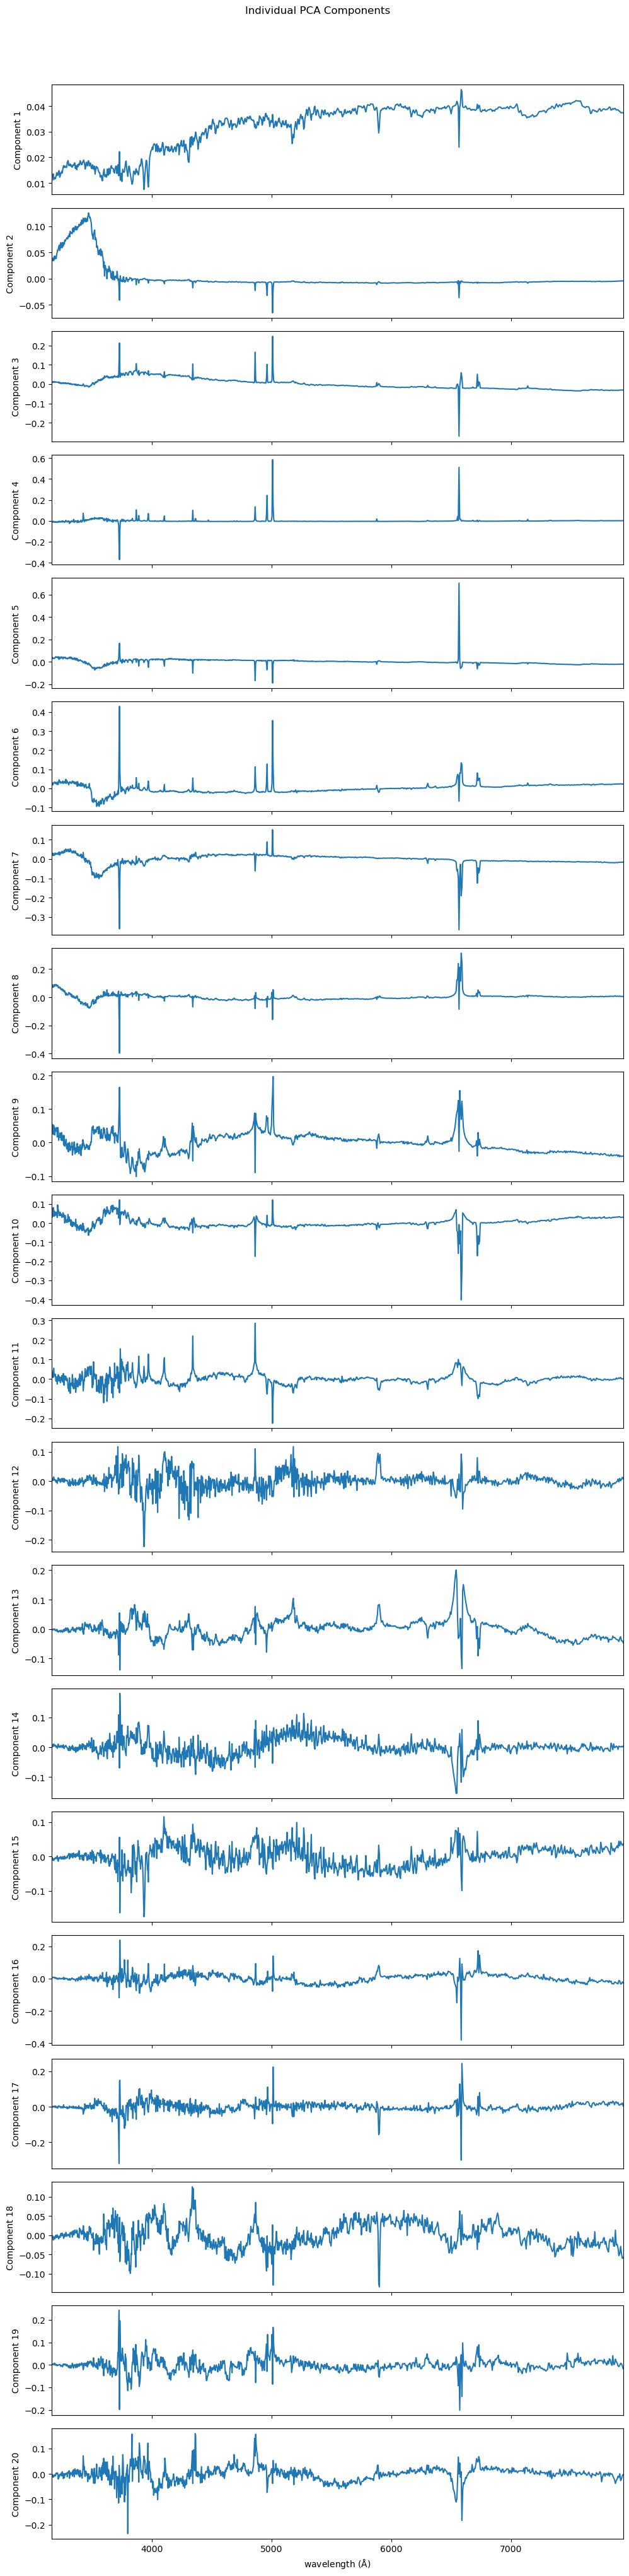

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming `spectra_corr` is your input data and `wavelengths` is your x-axis
# Load or preprocess your data here
# spectra_corr = ... (your spectra data)
# wavelengths = ... (your wavelength data)

# Number of components
n_components = 20

# Set up and fit the PCA model
pca = PCA(n_components=n_components)
pca.fit(spectra_corr)

# Extract the PCA components (eigenvectors)
pca_components = pca.components_

# Plot individual PCA components
fig, axs = plt.subplots(n_components, 1, figsize=(10, 2 * n_components), sharex=True)

for i, component in enumerate(pca_components):
    axs[i].plot(wavelengths, component, '-')
    axs[i].set_ylabel(f'Component {i + 1}')
    axs[i].set_xlim(wavelengths[0], wavelengths[-1])

axs[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
fig.suptitle('Individual PCA Components', y=1.02)
plt.tight_layout()
plt.show()


This code visualizes the results of a PCA by plotting the eigenvalues and their cumulative sum. The top subplot shows the eigenvalues on a logarithmic scale, helping to identify the significance of each principal component in explaining the variance. The bottom subplot shows the cumulative sum of these eigenvalues, indicating how much of the total variance is captured as more components are included. This visualization helps in determining the number of principal components necessary to retain a desired amount of variance in the data. The top panel shows the decrease in eigenvalue as a function of the number of eigenvectors, with a break in the distribution at ten eigenvectors. The lower panel shows the cumulative sum of eigenvalues normalized to unity. 94% of the variance in the SDSS spectra can be captured using the first ten eigenvectors.

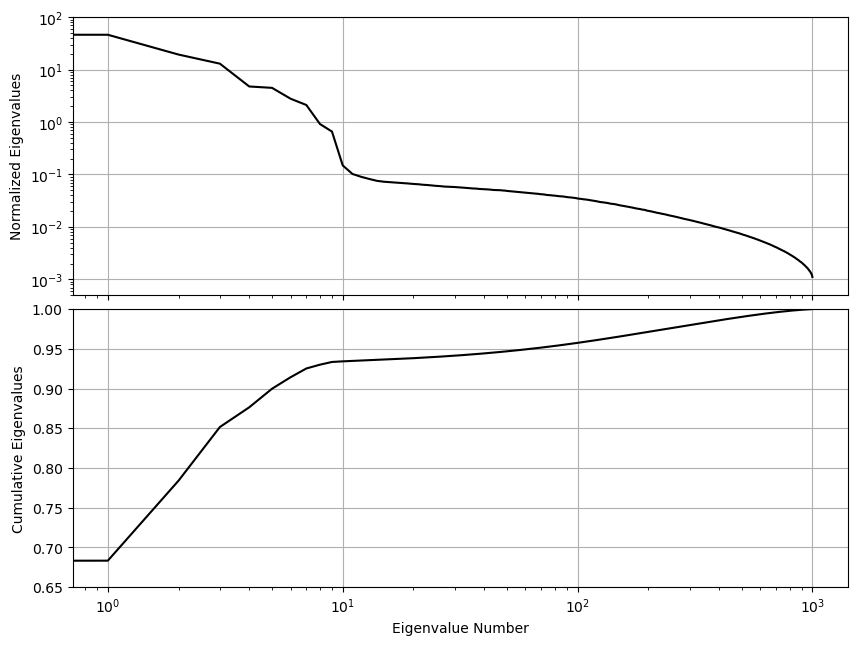

In [36]:
fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(hspace=0.05, bottom=0.12)

ax = fig.add_subplot(211, xscale='log', yscale='log')
ax.grid()
ax.plot(evals, c='k')
ax.set_ylabel('Normalized Eigenvalues')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylim(5E-4, 100)

ax = fig.add_subplot(212, xscale='log')
ax.grid()
ax.semilogx(evals_cs, color='k')
ax.set_xlabel('Eigenvalue Number')
ax.set_ylabel('Cumulative Eigenvalues')
ax.set_ylim(0.65, 1.00)

plt.show()

This code visualizes the process of PCA-based spectrum reconstruction. It compares the true spectrum (with masked regions) to reconstructions using a selected number of PCA components. Masked regions are highlighted, and the fidelity of the reconstruction can be observed by comparing the grey curves to the original black curve.

<>:56: SyntaxWarning: invalid escape sequence '\l'
<>:56: SyntaxWarning: invalid escape sequence '\l'
/var/folders/ft/v95g07nj1tqd8z0ypsb6_bqm0000gn/T/ipykernel_17082/534771094.py:56: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda\ (\AA)$')


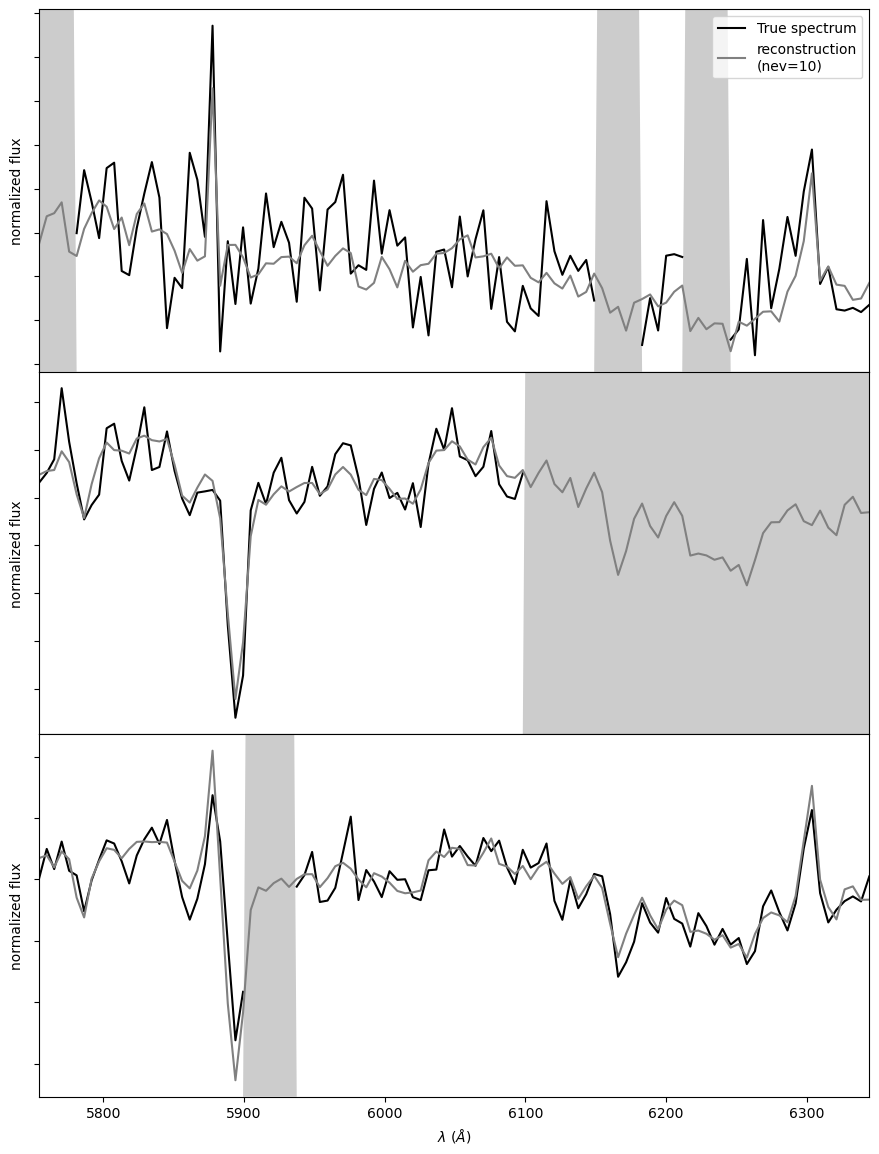

In [38]:
evecs = data['evecs']
mu = data['mu']
norms = data['norms']
mask = data['mask']

#------------------------------------------------------------
# plot the results
i_plot = ((wavelengths > 5750) & (wavelengths < 6350))
wavelength = wavelengths[i_plot]

specnums = [20, 8, 9]
subplots = [311, 312, 313]

fig = plt.figure(figsize=(10, 12.5))
fig.subplots_adjust(left=0.09, bottom=0.08, hspace=0, right=0.92, top=0.95)

for subplot, i in zip(subplots, specnums):
    ax = fig.add_subplot(subplot)

    # compute eigen-coefficients
    spectra_i_centered = spectra_corr[i] / norms[i] - mu
    coeffs = np.dot(spectra_i_centered, evecs.T)

    # blank out masked regions
    spectra_i = spectra_corr[i]
    mask_i = mask[i]
    spectra_i[mask_i] = np.nan

    # plot the raw masked spectrum
    ax.plot(wavelength, spectra_i[i_plot], '-', color='k',
            label='True spectrum', lw=1.5)

    # plot two levels of reconstruction
    for nev in [10]:
        if nev == 0:
            label = 'mean'
        else:
            label = 'reconstruction\n(nev=%i)' % nev
        spectra_i_recons = norms[i] * (mu + np.dot(coeffs[:nev], evecs[:nev]))
        ax.plot(wavelength, spectra_i_recons[i_plot], label=label, color='grey')

    # plot shaded background in masked region
    ylim = ax.get_ylim()
    mask_shade = ylim[0] + mask[i][i_plot].astype(float) * ylim[1]
    plt.fill(np.concatenate([wavelength[:1], wavelength, wavelength[-1:]]),
             np.concatenate([[ylim[0]], mask_shade, [ylim[0]]]),
             lw=0, fc='k', alpha=0.2)

    ax.set_xlim(wavelength[0], wavelength[-1])
    ax.set_ylim(ylim)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

    if subplot == 311:
        ax.legend(loc=1)

    ax.set_xlabel('$\lambda\ (\AA)$')
    ax.set_ylabel('normalized flux')

plt.show()

NMF is a matrix factorization technique used to decompose a dataset into a set of non-negative components and coefficients, useful in various applications like topic modeling, image processing, and collaborative filtering.
This example uses NMF to factorize a random dataset X into 3 components.
The proj matrix represents the original data projected onto these 3 components.
comp contains the learned components, and err quantifies how well these components represent the original data.

In [41]:
from sklearn.decomposition import NMF

X = np.random.random((100, 3))  # 100 points in 3 dims, all positive
nmf = NMF(n_components=3)  # setting n_components is optional
nmf.fit(X)
proj = nmf.transform(X)  # project to 3 dimensions

comp = nmf.components_  # 3 x 10 array of components
err = nmf.reconstruction_err_  # how well 3 components captures data

/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [42]:
from sklearn.decomposition import FastICA

X = np.random.normal(size=(100, 2))  # 100 pts in 2 dims
R = np.random.random((2, 5))  # mixing matrix
X = np.dot(X, R)  # X is now 2D data in 5D space
ica = FastICA(2)  # fit two components

sources = ica.fit_transform(X)
proj = ica.transform(X)  # 100 x 2 projection of data
comp = ica.components_  # the 2 x 5 matrix of indep. components

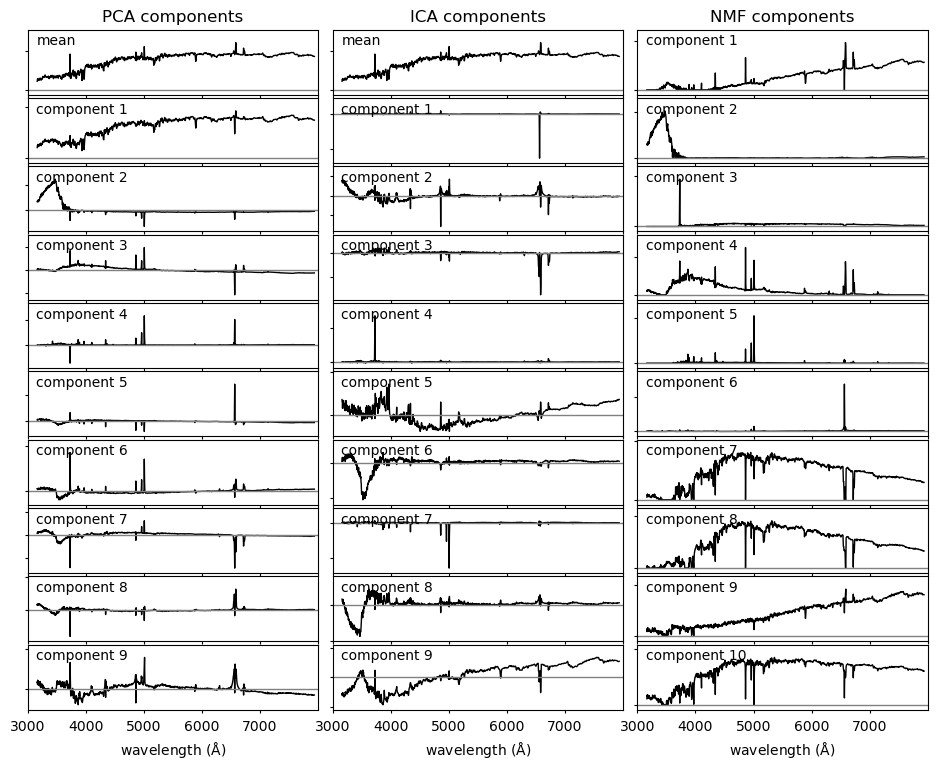

In [43]:
from sklearn.decomposition import NMF, FastICA, PCA

data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

#----------------------------------------------------------------------
# Compute PCA, ICA, and NMF components
def compute_PCA_ICA_NMF(n_components=10):
    spec_mean = spectra.mean(0)

    # PCA: use randomized PCA for speed
    pca = PCA(n_components - 1, random_state=0, svd_solver='randomized')
    pca.fit(spectra)
    pca_comp = np.vstack([spec_mean,
                          pca.components_])

    # ICA treats sequential observations as related.  Because of this, we need
    # to fit with the transpose of the spectra
    ica = FastICA(n_components - 1, random_state=0)
    ica.fit(spectra.T)
    ica_comp = np.vstack([spec_mean,
                          ica.transform(spectra.T).T])

    # NMF requires all elements of the input to be greater than zero
    spectra[spectra < 0] = 0
    nmf = NMF(n_components, random_state=0)
    nmf.fit(spectra)
    nmf_comp = nmf.components_

    return pca_comp, ica_comp, nmf_comp

n_components = 10
decompositions = compute_PCA_ICA_NMF(n_components)

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA components', 'ICA components', 'NMF components']

for i, comp in enumerate(decompositions):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.xaxis.set_major_locator(
                plt.FixedLocator(list(range(3000, 7999, 1000))))
            ax.set_xlabel(r'wavelength ${\rm (\AA)}$')

        ax.plot(wavelengths, comp[j], '-k', lw=1)

        # plot zero line
        xlim = [3000, 8000]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines():
            l.set_markersize(2)

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])

        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
        ax.set_xlim(xlim)


plt.show()

Unsure whether to use in the paper.
Code showing the PCA applied spectra (4 components) over the downloaded sdss spectra.

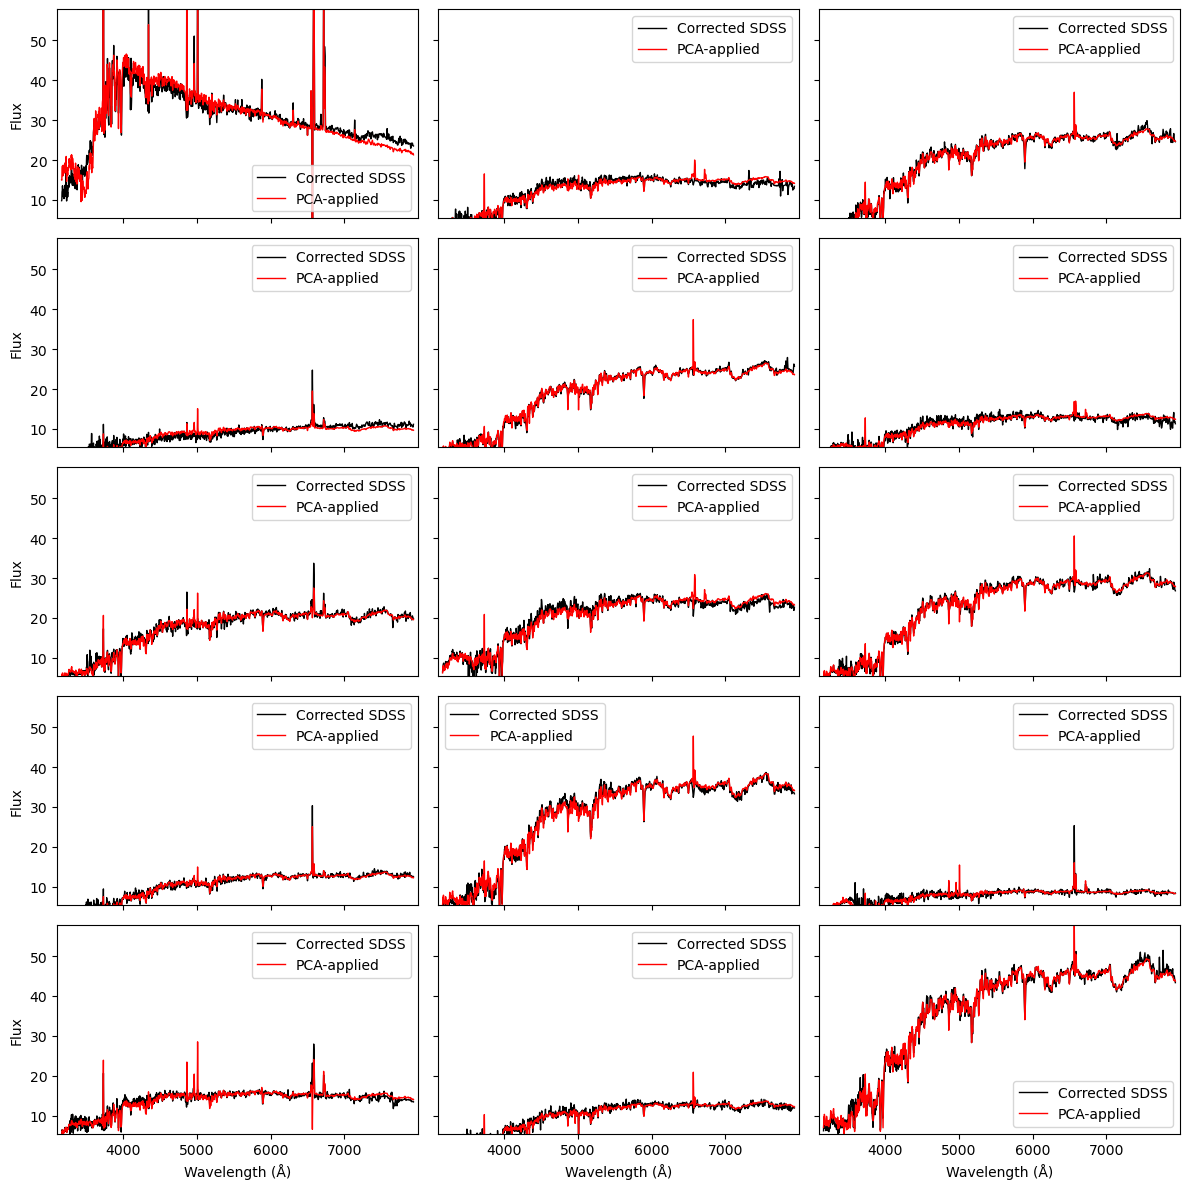

In [45]:
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import sdss_corrected_spectra

# Fetch and reconstruct SDSS spectra
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra_raw = data['spectra']
spectra_corr = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

# Apply PCA to the corrected spectra
pca = PCA(n_components=4)  # Adjust n_components as needed
spectra_corr_pca = pca.fit_transform(spectra_corr)

# Optionally, you can reconstruct PCA-applied spectra if needed
spectra_corr_pca_reconstructed = pca.inverse_transform(spectra_corr_pca)

# Select and plot random spectra
np.random.seed(5)
nrows = 5
ncols = 3
ind = np.random.randint(spectra_corr.shape[0], size=nrows * ncols)
spec_sample_raw = spectra_raw[ind]
spec_sample_corr = spectra_corr[ind]
spec_sample_corr_pca = spectra_corr_pca_reconstructed[ind]

fig, axs = plt.subplots(nrows, ncols, figsize=(12, 12), sharex=True, sharey=True)

for i in range(ncols):
    for j in range(nrows):
        idx = ncols * j + i
        ax = axs[j, i]
        ax.plot(wavelengths, spec_sample_corr[idx], '-k', lw=1, label='Corrected SDSS')
        ax.plot(wavelengths, spec_sample_corr_pca[idx], '-r', lw=1, label='PCA-applied')
        ax.set_xlim(3100, 7999)
        ax.set_ylim(min(np.min(spec_sample_corr[idx]), np.min(spec_sample_corr_pca[idx])),
                    max(np.max(spec_sample_corr[idx]), np.max(spec_sample_corr_pca[idx])))

        if j == nrows - 1:
            ax.set_xlabel('Wavelength (Å)')
        if i == 0:
            ax.set_ylabel('Flux')

        ax.legend()

fig.tight_layout()
plt.show()


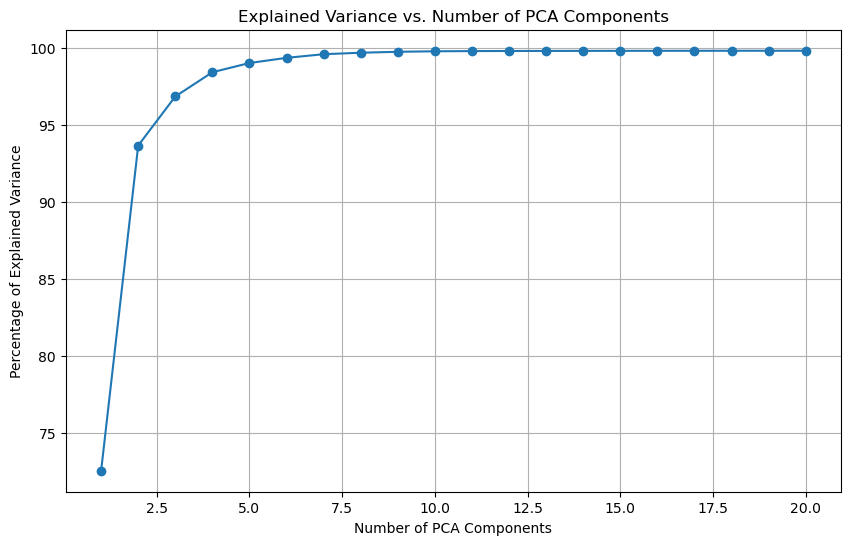

In [46]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from astroML.datasets import sdss_corrected_spectra

# Fetch the SDSS spectra data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra_corr = sdss_corrected_spectra.reconstruct_spectra(data)

# Fit PCA and calculate explained variance for a range of components
n_components = np.arange(1, 21)  # Number of components to test
explained_variance_ratios = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(spectra_corr)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the percentage of explained variance against the number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components, np.array(explained_variance_ratios) * 100, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


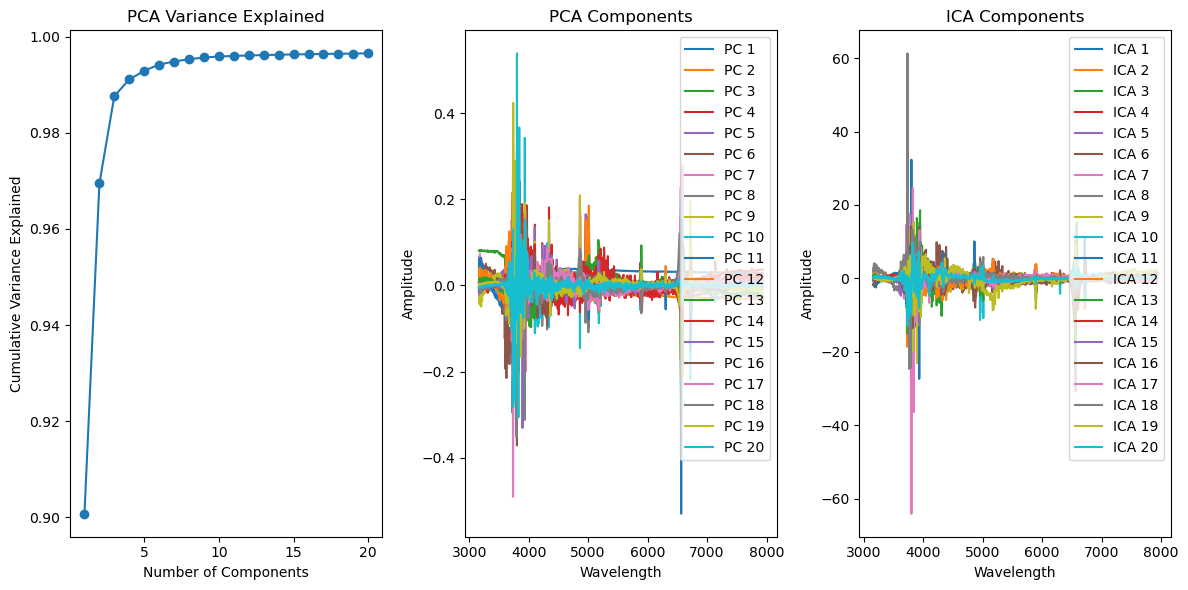

PCA Reconstruction Error: 0.0000
ICA Reconstruction Error: 0.0213
NMF Reconstruction Error: 0.0000


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Assuming `spectra_corr` is your input data and `wavelengths` is your x-axis
# Load or preprocess your data here
# spectra_corr = ... (your spectra data)
# wavelengths = ... (your wavelength data)

# Check for negative values
if (spectra_corr < 0).any():
    print("Negative values detected in spectra_corr. Applying min-max scaling.")

    # Apply Min-Max Scaling to ensure all values are non-negative
    scaler = MinMaxScaler()
    spectra_corr = scaler.fit_transform(spectra_corr)

# Number of components
n_components = 20

# PCA
pca = PCA(n_components=n_components)
pca.fit(spectra_corr)
pca_components = pca.components_
pca_mean = pca.mean_
pca_coeff = np.dot(pca_components, spectra_corr.T - pca_mean[:, np.newaxis])
reconstructed_pca = pca_mean + np.dot(pca_coeff.T, pca_components)
pca_reconstruction_error = mean_squared_error(spectra_corr, reconstructed_pca)

# ICA
ica = FastICA(n_components=n_components, random_state=42)
S_ = ica.fit_transform(spectra_corr)  # Get the independent components
ica_components = ica.components_  # These are the sources
A_ = ica.mixing_  # Mixing matrix
reconstructed_ica = np.dot(S_, A_.T)  # Reconstruct the data
ica_reconstruction_error = mean_squared_error(spectra_corr, reconstructed_ica)

# NMF
nmf = NMF(n_components=n_components, init='random', random_state=42)
W = nmf.fit_transform(spectra_corr)
H = nmf.components_
reconstructed_nmf = np.dot(W, H)
nmf_reconstruction_error = mean_squared_error(spectra_corr, reconstructed_nmf)

# Plot Variance Explained by PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(np.arange(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('PCA Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')

# Plot Individual PCA Components
plt.subplot(1, 3, 2)
for i, component in enumerate(pca_components):
    plt.plot(wavelengths, component, label=f'PC {i + 1}')
plt.title('PCA Components')
plt.xlabel('Wavelength')
plt.ylabel('Amplitude')
plt.legend()

# Plot Individual ICA Components
plt.subplot(1, 3, 3)
for i, component in enumerate(ica_components):
    plt.plot(wavelengths, component, label=f'ICA {i + 1}')
plt.title('ICA Components')
plt.xlabel('Wavelength')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# Print reconstruction errors
print(f'PCA Reconstruction Error: {pca_reconstruction_error:.4f}')
print(f'ICA Reconstruction Error: {ica_reconstruction_error:.4f}')
print(f'NMF Reconstruction Error: {nmf_reconstruction_error:.4f}')
